## <strong>Company Insolvency Exploratory Data Analysis and prediction using Machine Learning</strong>
This notebook aims to analyse the financials of 9792 Polish companies, and the solvency status of these companies to determine and predict the insolvency risk.<br>
The final model was then compared against a dummy model and the Altman Z-Score to test its effectiveness using a test scenario<br>
<br>
The data of the companies are taken from the UCI Machine Learning Repository Repository: http://archive.ics.uci.edu/ml/datasets/polish+companies+bankruptcy+data

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

# <strong>Data Cleaning</strong>

In [2]:
data = arff.loadarff("/Users/Bren/Coding/Bankruptcy prediction/4year.arff")
df_raw = pd.DataFrame(data[0])

df_raw

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.159290,0.46240,0.077730,1.16830,-44.8530,0.467020,0.189480,0.82895,1.12230,0.38330,...,0.108990,0.415570,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.05600,b'0'
1,-0.127430,0.46243,0.269170,1.75170,7.5970,0.000925,-0.127430,1.16250,1.29440,0.53757,...,-0.089372,-0.237040,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.47250,b'0'
2,0.070488,0.23570,0.527810,3.23930,125.6800,0.163670,0.086895,2.87180,1.05740,0.67689,...,0.054286,0.104130,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.78180,b'0'
3,0.136760,0.40538,0.315430,1.87050,19.1150,0.504970,0.136760,1.45390,1.11440,0.58938,...,0.102630,0.232030,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.64840,b'0'
4,-0.110080,0.69793,0.188780,1.27130,-15.3440,0.000000,-0.110080,0.43282,1.73500,0.30207,...,0.439880,-0.364400,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.03600,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,0.004676,0.54949,0.192810,1.38990,-39.0640,0.004676,0.013002,0.78627,0.97093,0.43205,...,-0.029937,0.010823,1.02990,0.127190,3.8159,3.3892,146.860,2.4854,3.93150,b'1'
9788,-0.027610,0.60748,-0.029762,0.90591,-20.9230,-0.027610,-0.027610,0.55161,1.00730,0.33509,...,0.007198,-0.082395,0.99280,0.868910,23.0280,27.1360,37.047,9.8523,4.36810,b'1'
9789,-0.238290,0.62708,0.090374,1.61250,-1.0692,-0.238290,-0.240360,0.28322,0.80307,0.17760,...,-0.245220,-1.341700,1.24520,2.700100,6.5694,4.1781,88.883,4.1065,0.79501,b'1'
9790,0.097188,0.75300,-0.327680,0.43850,-214.2400,-0.331300,0.104280,0.32803,0.98145,0.24700,...,0.288240,0.393470,0.68127,0.508850,4.3246,35.5030,217.030,1.6818,1.31910,b'1'


In [3]:
attributes = """1 net profit / total assets
X2 total liabilities / total assets
X3 working capital / total assets
X4 current assets / short-term liabilities
X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
X6 retained earnings / total assets
X7 EBIT / total assets
X8 book value of equity / total liabilities
X9 sales / total assets
X10 equity / total assets
X11 (gross profit + extraordinary items + financial expenses) / total assets
X12 gross profit / short-term liabilities
X13 (gross profit + depreciation) / sales
X14 (gross profit + interest) / total assets
X15 (total liabilities * 365) / (gross profit + depreciation)
X16 (gross profit + depreciation) / total liabilities
X17 total assets / total liabilities
X18 gross profit / total assets
X19 gross profit / sales
X20 (inventory * 365) / sales
X21 sales (n) / sales (n-1)
X22 profit on operating activities / total assets
X23 net profit / sales
X24 gross profit (in 3 years) / total assets
X25 (equity - share capital) / total assets
X26 (net profit + depreciation) / total liabilities
X27 profit on operating activities / financial expenses
X28 working capital / fixed assets
X29 logarithm of total assets
X30 (total liabilities - cash) / sales
X31 (gross profit + interest) / sales
X32 (current liabilities * 365) / cost of products sold
X33 operating expenses / short-term liabilities
X34 operating expenses / total liabilities
X35 profit on sales / total assets
X36 total sales / total assets
X37 (current assets - inventories) / long-term liabilities
X38 constant capital / total assets
X39 profit on sales / sales
X40 (current assets - inventory - receivables) / short-term liabilities
X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
X42 profit on operating activities / sales
X43 rotation receivables + inventory turnover in days
X44 (receivables * 365) / sales
X45 net profit / inventory
X46 (current assets - inventory) / short-term liabilities
X47 (inventory * 365) / cost of products sold
X48 EBITDA (profit on operating activities - depreciation) / total assets
X49 EBITDA (profit on operating activities - depreciation) / sales
X50 current assets / total liabilities
X51 short-term liabilities / total assets
X52 (short-term liabilities * 365) / cost of products sold)
X53 equity / fixed assets
X54 constant capital / fixed assets
X55 working capital
X56 (sales - cost of products sold) / sales
X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
X58 total costs /total sales
X59 long-term liabilities / equity
X60 sales / inventory
X61 sales / receivables
X62 (short-term liabilities *365) / sales
X63 sales / short-term liabilities
X64 sales / fixed assets"""

attribute_list = attributes.split("\nX")
attribute_list_caps = [i.title() for i in attribute_list]
attribute_list_caps.append("Class")              
df_raw.columns = attribute_list_caps
pd.options.display.max_columns = 100
df_raw["Class"]

0       b'0'
1       b'0'
2       b'0'
3       b'0'
4       b'0'
        ... 
9787    b'1'
9788    b'1'
9789    b'1'
9790    b'1'
9791    b'1'
Name: Class, Length: 9792, dtype: object

In [4]:
df_raw["Class"] = df_raw["Class"].astype(str)
df_raw["Class"] = df_raw["Class"].map({"b'1'": 1, "b'0'": 0})
df_raw["Class"]

0       0
1       0
2       0
3       0
4       0
       ..
9787    1
9788    1
9789    1
9790    1
9791    1
Name: Class, Length: 9792, dtype: int64

In [5]:
df_raw.describe()

,1 Net Profit / Total Assets,2 Total Liabilities / Total Assets,3 Working Capital / Total Assets,4 Current Assets / Short-Term Liabilities,5 [(Cash + Short-Term Securities + Receivables - Short-Term Liabilities) / (Operating Expenses - Depreciation)] * 365,6 Retained Earnings / Total Assets,7 Ebit / Total Assets,8 Book Value Of Equity / Total Liabilities,9 Sales / Total Assets,10 Equity / Total Assets,11 (Gross Profit + Extraordinary Items + Financial Expenses) / Total Assets,12 Gross Profit / Short-Term Liabilities,13 (Gross Profit + Depreciation) / Sales,14 (Gross Profit + Interest) / Total Assets,15 (Total Liabilities * 365) / (Gross Profit + Depreciation),16 (Gross Profit + Depreciation) / Total Liabilities,17 Total Assets / Total Liabilities,18 Gross Profit / Total Assets,19 Gross Profit / Sales,20 (Inventory * 365) / Sales,21 Sales (N) / Sales (N-1),22 Profit On Operating Activities / Total Assets,23 Net Profit / Sales,24 Gross Profit (In 3 Years) / Total Assets,25 (Equity - Share Capital) / Total Assets,26 (Net Profit + Depreciation) / Total Liabilities,27 Profit On Operating Activities / Financial Expenses,28 Working Capital / Fixed Assets,29 Logarithm Of Total Assets,30 (Total Liabilities - Cash) / Sales,31 (Gross Profit + Interest) / Sales,32 (Current Liabilities * 365) / Cost Of Products Sold,33 Operating Expenses / Short-Term Liabilities,34 Operating Expenses / Total Liabilities,35 Profit On Sales / Total Assets,36 Total Sales / Total Assets,37 (Current Assets - Inventories) / Long-Term Liabilities,38 Constant Capital / Total Assets,39 Profit On Sales / Sales,40 (Current Assets - Inventory - Receivables) / Short-Term Liabilities,41 Total Liabilities / ((Profit On Operating Activities + Depreciation) * (12/365)),42 Profit On Operating Activities / Sales,43 Rotation Receivables + Inventory Turnover In Days,44 (Receivables * 365) / Sales,45 Net Profit / Inventory,46 (Current Assets - Inventory) / Short-Term Liabilities,47 (Inventory * 365) / Cost Of Products Sold,48 Ebitda (Profit On Operating Activities - Depreciation) / Total Assets,49 Ebitda (Profit On Operating Activities - Depreciation) / Sales,50 Current Assets / Total Liabilities,51 Short-Term Liabilities / Total Assets,52 (Short-Term Liabilities * 365) / Cost Of Products Sold),53 Equity / Fixed Assets,54 Constant Capital / Fixed Assets,55 Working Capital,56 (Sales - Cost Of Products Sold) / Sales,57 (Current Assets - Inventory - Short-Term Liabilities) / (Sales - Gross Profit - Depreciation),58 Total Costs /Total Sales,59 Long-Term Liabilities / Equity,60 Sales / Inventory,61 Sales / Receivables,62 (Short-Term Liabilities *365) / Sales,63 Sales / Short-Term Liabilities,64 Sales / Fixed Assets,Class
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,9791.000000,9749.000000,9771.000000,9791.000000,9.784000e+03,9773.000000,9773.000000,9791.000000,9771.000000,9771.000000,9634.000000,9791.000000,9771.000000,9581.000000,9791.000000,9773.000000,9.151000e+03,9561.000000,9791.000000,9771.000000,9771.000000,9696.000000,9749.000000,9773.000000,9791.000000,9791.000000,5350.000000,9791.000000,9771.000000,9749.000000,9605.000000,9771.000000,9.771000e+03,9.771000e+03,9179.000000,9749.000000,9719.000000,9791.000000,9771.000000,9773.000000,9791.000000,9716.000000,9561.000000,9561.000000,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000,9792.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,0.075417,0.210989,0.398902,0.059460,3.017681e+03,0.617918,20.976033,0.064580,-0.019081,62.704589,1.218724,0.066203,-0.070364,0.247742,0.222839,0.451115,1.115883e+03,6.725180,3.946479,5.353531,0.041258,341.625124,8.445313,4.979157,0.058091,2.077261,70.659877,0.487190,-1.072578,3.064235,0.968902,-0.371479,7.356944e+02,6.729892e+02,5.458024,7.274189,112.989701,-0.002370,-0.517222,7.085001,0.4

In [6]:
pd.options.display.max_rows = 70
df_raw.isna().sum()

1 Net Profit / Total Assets                                                                                                 1
2 Total Liabilities / Total Assets                                                                                          1
3 Working Capital / Total Assets                                                                                            1
4 Current Assets / Short-Term Liabilities                                                                                  43
5 [(Cash + Short-Term Securities + Receivables - Short-Term Liabilities) / (Operating Expenses - Depreciation)] * 365      21
6 Retained Earnings / Total Assets                                                                                          1
7 Ebit / Total Assets                                                                                                       1
8 Book Value Of Equity / Total Liabilities                                                                            

In [7]:
#dropping columns with too many Nan values
df_drop = df_raw.drop(["24 Gross Profit (In 3 Years) / Total Assets",
                       "37 (Current Assets - Inventories) / Long-Term Liabilities"], 
                      axis = 1)

In [8]:
df_no_na = df_drop.dropna()
df_no_na.describe()

,1 Net Profit / Total Assets,2 Total Liabilities / Total Assets,3 Working Capital / Total Assets,4 Current Assets / Short-Term Liabilities,5 [(Cash + Short-Term Securities + Receivables - Short-Term Liabilities) / (Operating Expenses - Depreciation)] * 365,6 Retained Earnings / Total Assets,7 Ebit / Total Assets,8 Book Value Of Equity / Total Liabilities,9 Sales / Total Assets,10 Equity / Total Assets,11 (Gross Profit + Extraordinary Items + Financial Expenses) / Total Assets,12 Gross Profit / Short-Term Liabilities,13 (Gross Profit + Depreciation) / Sales,14 (Gross Profit + Interest) / Total Assets,15 (Total Liabilities * 365) / (Gross Profit + Depreciation),16 (Gross Profit + Depreciation) / Total Liabilities,17 Total Assets / Total Liabilities,18 Gross Profit / Total Assets,19 Gross Profit / Sales,20 (Inventory * 365) / Sales,21 Sales (N) / Sales (N-1),22 Profit On Operating Activities / Total Assets,23 Net Profit / Sales,25 (Equity - Share Capital) / Total Assets,26 (Net Profit + Depreciation) / Total Liabilities,27 Profit On Operating Activities / Financial Expenses,28 Working Capital / Fixed Assets,29 Logarithm Of Total Assets,30 (Total Liabilities - Cash) / Sales,31 (Gross Profit + Interest) / Sales,32 (Current Liabilities * 365) / Cost Of Products Sold,33 Operating Expenses / Short-Term Liabilities,34 Operating Expenses / Total Liabilities,35 Profit On Sales / Total Assets,36 Total Sales / Total Assets,38 Constant Capital / Total Assets,39 Profit On Sales / Sales,40 (Current Assets - Inventory - Receivables) / Short-Term Liabilities,41 Total Liabilities / ((Profit On Operating Activities + Depreciation) * (12/365)),42 Profit On Operating Activities / Sales,43 Rotation Receivables + Inventory Turnover In Days,44 (Receivables * 365) / Sales,45 Net Profit / Inventory,46 (Current Assets - Inventory) / Short-Term Liabilities,47 (Inventory * 365) / Cost Of Products Sold,48 Ebitda (Profit On Operating Activities - Depreciation) / Total Assets,49 Ebitda (Profit On Operating Activities - Depreciation) / Sales,50 Current Assets / Total Liabilities,51 Short-Term Liabilities / Total Assets,52 (Short-Term Liabilities * 365) / Cost Of Products Sold),53 Equity / Fixed Assets,54 Constant Capital / Fixed Assets,55 Working Capital,56 (Sales - Cost Of Products Sold) / Sales,57 (Current Assets - Inventory - Short-Term Liabilities) / (Sales - Gross Profit - Depreciation),58 Total Costs /Total Sales,59 Long-Term Liabilities / Equity,60 Sales / Inventory,61 Sales / Receivables,62 (Short-Term Liabilities *365) / Sales,63 Sales / Short-Term Liabilities,64 Sales / Fixed Assets,Class
count,8267.000000,8267.000000,8267.000000,8267.000000,8.267000e+03,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8.267000e+03,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8.267000e+03,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8.267000e+03,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8.267000e+03,8267.000000,8267.000000,8267.000000
mean,0.049402,0.515712,0.182405,2.758039,7.955298e+01,0.063201,0.061327,2.748936,1.601432,0.465372,0.076450,0.438513,0.367755,0.061343,2.985195e+03,0.585471,3.834701,0.067407,-0.007613,57.496742,1.157066,0.070069,-0.015708,0.333620,0.533693,1.148227e+03,5.537618,4.067722,1.030037,0.005311,191.386191,6.471813,3.483864,0.064022,1.830848,0.557777,0.003877,0.861913,0.743496,0.010710,219.760203,162.262952,2.741835,1.924466,105.958853,0.010023,-0.042891,2.205383,0.401415,0.471028,4.839427,6.228028,8.379878e+03,0.028772,-0.007009,0.978884,0.994215,94.167551,11.614541,3.050840e+02,7.031744,30.828097,0.027580
std,0.183695,

In [9]:
#capping extreme outliers
df_clean = pd.DataFrame(index = df_no_na.index)

for col in df_no_na:
    low = df_no_na[col].quantile(0.005)
    high = df_no_na[col].quantile(0.995)
    
    df_clean[col] = np.where(df_no_na[col] > high, 
                             high, 
                             np.where(df_no_na[col] < low,
                                      low, 
                                      df_no_na[col]))
df_clean["Class"] = df_no_na["Class"]
df_clean.describe()

,1 Net Profit / Total Assets,2 Total Liabilities / Total Assets,3 Working Capital / Total Assets,4 Current Assets / Short-Term Liabilities,5 [(Cash + Short-Term Securities + Receivables - Short-Term Liabilities) / (Operating Expenses - Depreciation)] * 365,6 Retained Earnings / Total Assets,7 Ebit / Total Assets,8 Book Value Of Equity / Total Liabilities,9 Sales / Total Assets,10 Equity / Total Assets,11 (Gross Profit + Extraordinary Items + Financial Expenses) / Total Assets,12 Gross Profit / Short-Term Liabilities,13 (Gross Profit + Depreciation) / Sales,14 (Gross Profit + Interest) / Total Assets,15 (Total Liabilities * 365) / (Gross Profit + Depreciation),16 (Gross Profit + Depreciation) / Total Liabilities,17 Total Assets / Total Liabilities,18 Gross Profit / Total Assets,19 Gross Profit / Sales,20 (Inventory * 365) / Sales,21 Sales (N) / Sales (N-1),22 Profit On Operating Activities / Total Assets,23 Net Profit / Sales,25 (Equity - Share Capital) / Total Assets,26 (Net Profit + Depreciation) / Total Liabilities,27 Profit On Operating Activities / Financial Expenses,28 Working Capital / Fixed Assets,29 Logarithm Of Total Assets,30 (Total Liabilities - Cash) / Sales,31 (Gross Profit + Interest) / Sales,32 (Current Liabilities * 365) / Cost Of Products Sold,33 Operating Expenses / Short-Term Liabilities,34 Operating Expenses / Total Liabilities,35 Profit On Sales / Total Assets,36 Total Sales / Total Assets,38 Constant Capital / Total Assets,39 Profit On Sales / Sales,40 (Current Assets - Inventory - Receivables) / Short-Term Liabilities,41 Total Liabilities / ((Profit On Operating Activities + Depreciation) * (12/365)),42 Profit On Operating Activities / Sales,43 Rotation Receivables + Inventory Turnover In Days,44 (Receivables * 365) / Sales,45 Net Profit / Inventory,46 (Current Assets - Inventory) / Short-Term Liabilities,47 (Inventory * 365) / Cost Of Products Sold,48 Ebitda (Profit On Operating Activities - Depreciation) / Total Assets,49 Ebitda (Profit On Operating Activities - Depreciation) / Sales,50 Current Assets / Total Liabilities,51 Short-Term Liabilities / Total Assets,52 (Short-Term Liabilities * 365) / Cost Of Products Sold),53 Equity / Fixed Assets,54 Constant Capital / Fixed Assets,55 Working Capital,56 (Sales - Cost Of Products Sold) / Sales,57 (Current Assets - Inventory - Short-Term Liabilities) / (Sales - Gross Profit - Depreciation),58 Total Costs /Total Sales,59 Long-Term Liabilities / Equity,60 Sales / Inventory,61 Sales / Receivables,62 (Short-Term Liabilities *365) / Sales,63 Sales / Short-Term Liabilities,64 Sales / Fixed Assets,Class
count,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000
mean,0.050496,0.510125,0.187510,2.598957,-15.632894,0.006915,0.062224,2.523900,1.588575,0.471075,0.076533,0.429075,0.074625,0.062240,1562.696836,0.551081,3.610260,0.062349,0.030070,52.702971,1.106218,0.069907,0.022352,0.341895,0.500532,245.872543,2.365061,4.068221,0.350314,0.038410,116.418120,6.303780,3.364167,0.063689,1.816986,0.563506,0.030057,0.746945,0.261245,0.035630,122.642673,68.705292,1.343227,1.795483,58.513816,0.011695,-0.007545,2.059614,0.395888,0.312733,2.868523,3.177302,7210.563672,0.056197,0.103809,0.942564,0.294336,41.149740,9.894693,105.610884,6.858361,15.887463,0.027580
std,0.146089,0.337119,0.321377,3

# Exploratory Data Analysis

In [10]:
df_clean.describe()

,1 Net Profit / Total Assets,2 Total Liabilities / Total Assets,3 Working Capital / Total Assets,4 Current Assets / Short-Term Liabilities,5 [(Cash + Short-Term Securities + Receivables - Short-Term Liabilities) / (Operating Expenses - Depreciation)] * 365,6 Retained Earnings / Total Assets,7 Ebit / Total Assets,8 Book Value Of Equity / Total Liabilities,9 Sales / Total Assets,10 Equity / Total Assets,11 (Gross Profit + Extraordinary Items + Financial Expenses) / Total Assets,12 Gross Profit / Short-Term Liabilities,13 (Gross Profit + Depreciation) / Sales,14 (Gross Profit + Interest) / Total Assets,15 (Total Liabilities * 365) / (Gross Profit + Depreciation),16 (Gross Profit + Depreciation) / Total Liabilities,17 Total Assets / Total Liabilities,18 Gross Profit / Total Assets,19 Gross Profit / Sales,20 (Inventory * 365) / Sales,21 Sales (N) / Sales (N-1),22 Profit On Operating Activities / Total Assets,23 Net Profit / Sales,25 (Equity - Share Capital) / Total Assets,26 (Net Profit + Depreciation) / Total Liabilities,27 Profit On Operating Activities / Financial Expenses,28 Working Capital / Fixed Assets,29 Logarithm Of Total Assets,30 (Total Liabilities - Cash) / Sales,31 (Gross Profit + Interest) / Sales,32 (Current Liabilities * 365) / Cost Of Products Sold,33 Operating Expenses / Short-Term Liabilities,34 Operating Expenses / Total Liabilities,35 Profit On Sales / Total Assets,36 Total Sales / Total Assets,38 Constant Capital / Total Assets,39 Profit On Sales / Sales,40 (Current Assets - Inventory - Receivables) / Short-Term Liabilities,41 Total Liabilities / ((Profit On Operating Activities + Depreciation) * (12/365)),42 Profit On Operating Activities / Sales,43 Rotation Receivables + Inventory Turnover In Days,44 (Receivables * 365) / Sales,45 Net Profit / Inventory,46 (Current Assets - Inventory) / Short-Term Liabilities,47 (Inventory * 365) / Cost Of Products Sold,48 Ebitda (Profit On Operating Activities - Depreciation) / Total Assets,49 Ebitda (Profit On Operating Activities - Depreciation) / Sales,50 Current Assets / Total Liabilities,51 Short-Term Liabilities / Total Assets,52 (Short-Term Liabilities * 365) / Cost Of Products Sold),53 Equity / Fixed Assets,54 Constant Capital / Fixed Assets,55 Working Capital,56 (Sales - Cost Of Products Sold) / Sales,57 (Current Assets - Inventory - Short-Term Liabilities) / (Sales - Gross Profit - Depreciation),58 Total Costs /Total Sales,59 Long-Term Liabilities / Equity,60 Sales / Inventory,61 Sales / Receivables,62 (Short-Term Liabilities *365) / Sales,63 Sales / Short-Term Liabilities,64 Sales / Fixed Assets,Class
count,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000
mean,0.050496,0.510125,0.187510,2.598957,-15.632894,0.006915,0.062224,2.523900,1.588575,0.471075,0.076533,0.429075,0.074625,0.062240,1562.696836,0.551081,3.610260,0.062349,0.030070,52.702971,1.106218,0.069907,0.022352,0.341895,0.500532,245.872543,2.365061,4.068221,0.350314,0.038410,116.418120,6.303780,3.364167,0.063689,1.816986,0.563506,0.030057,0.746945,0.261245,0.035630,122.642673,68.705292,1.343227,1.795483,58.513816,0.011695,-0.007545,2.059614,0.395888,0.312733,2.868523,3.177302,7210.563672,0.056197,0.103809,0.942564,0.294336,41.149740,9.894693,105.610884,6.858361,15.887463,0.027580
std,0.146089,0.337119,0.321377,3

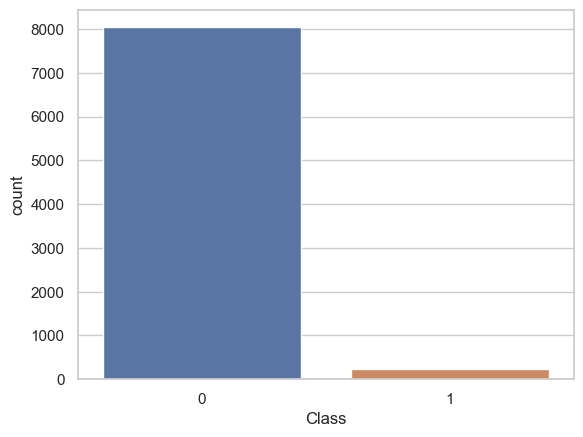

In [11]:
c = "Class"
sns.set_theme(style="whitegrid")
sns.countplot(x = df_clean[c],data = df_clean);

In [12]:
df_solvent = df_clean[df_clean[c] == 0]
df_insolvent = df_clean[df_clean[c] == 1]

# Debt ratio

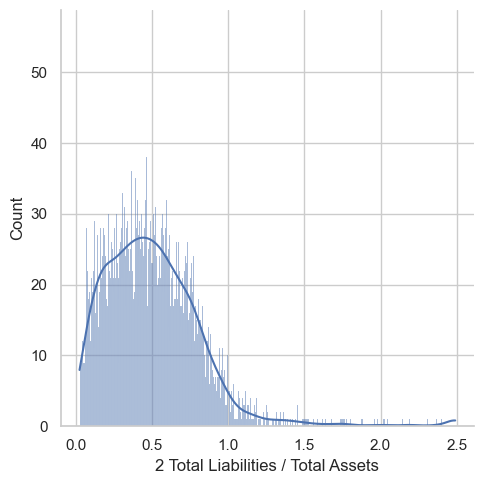

In [13]:
dr = "2 Total Liabilities / Total Assets"
sns.displot(data = df_clean[dr], bins=1000, kde = True, aspect = 1);

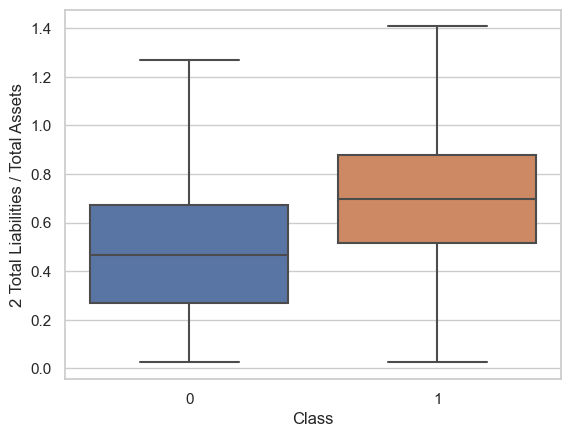

In [14]:
sns.boxplot(x=df_clean[c], y=df_clean[dr], showfliers = False);
plt.show()

In [15]:
print(sp.stats.mannwhitneyu(x=df_solvent[c], y=df_solvent[dr]))
print(sp.stats.mannwhitneyu(x=df_insolvent[c], y=df_insolvent[dr]))

MannwhitneyuResult(statistic=0.0, pvalue=0.0)
MannwhitneyuResult(statistic=44688.0, pvalue=8.571605601998454e-46)


# Current Ratio

(-5.0, 30.0)

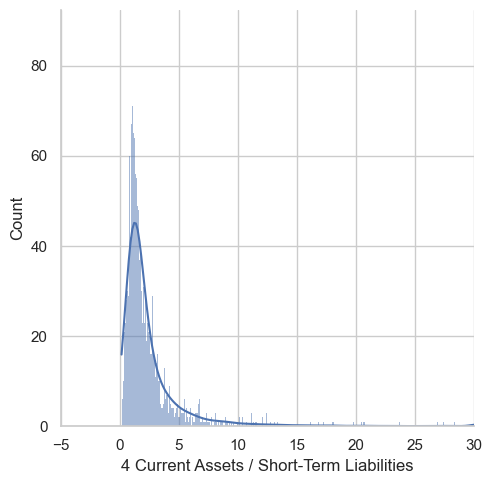

In [16]:
cr = "4 Current Assets / Short-Term Liabilities"
sns.displot(data = df_clean[cr], bins=2000, kde = True, aspect = 1);
plt.xlim(-5, 30)

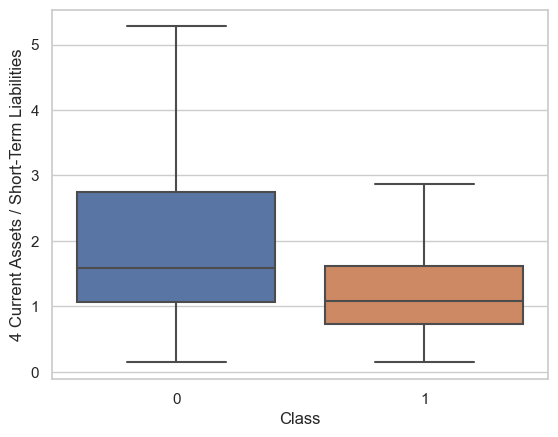

In [17]:
sns.boxplot(x=df_clean[c], y=df_clean[cr], showfliers = False);
plt.show()

In [18]:
print(sp.stats.mannwhitneyu(x=df_solvent[c], y=df_solvent[cr]))
print(sp.stats.mannwhitneyu(x=df_insolvent[c], y=df_insolvent[cr]))

MannwhitneyuResult(statistic=0.0, pvalue=0.0)
MannwhitneyuResult(statistic=22572.0, pvalue=0.009374066088260347)


# Quick Ratio

(0.0, 500.0)

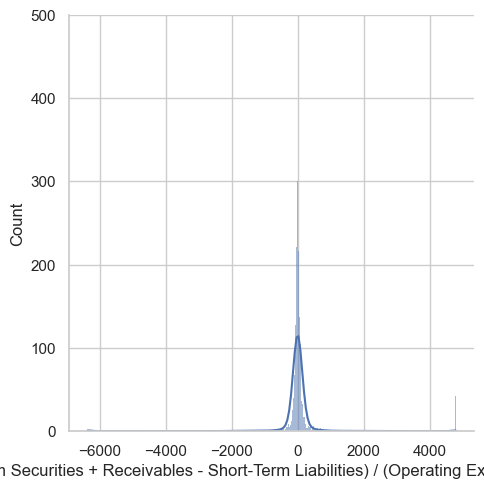

In [19]:
qr = "5 [(Cash + Short-Term Securities + Receivables - Short-Term Liabilities) / (Operating Expenses - Depreciation)] * 365"
sns.displot(data = df_clean[qr], bins=2000, kde = True, aspect = 1);
plt.ylim(0,500)

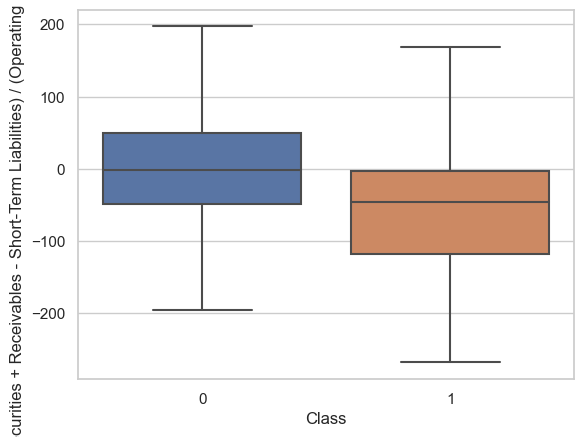

In [20]:
sns.boxplot(x=df_clean[c], y=df_clean[qr], showfliers = False);
plt.show()

In [21]:
print(sp.stats.mannwhitneyu(x=df_solvent[c], y=df_solvent[qr]))
print(sp.stats.mannwhitneyu(x=df_insolvent[c], y=df_insolvent[qr]))

MannwhitneyuResult(statistic=32791081.0, pvalue=0.08226453677169622)
MannwhitneyuResult(statistic=40128.0, pvalue=6.604214160960093e-27)


# Gross profit margin

(-2.0, 2.0)

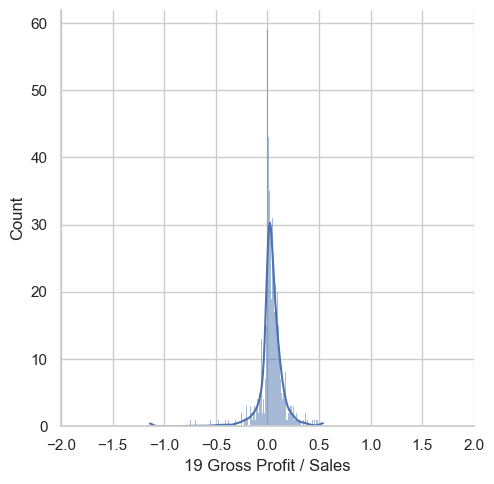

In [22]:
gpm = "19 Gross Profit / Sales"
sns.displot(data = df_clean[gpm], bins=3000, kde = True, aspect = 1);
plt.xlim(-2, 2)

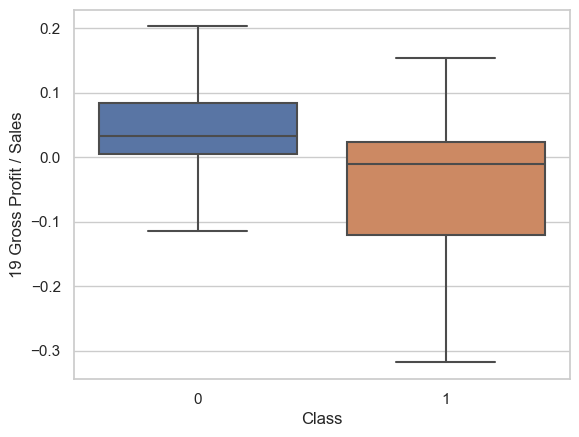

In [23]:
sns.boxplot(x=df_clean[c], y=df_clean[gpm], showfliers = False);
plt.show()

In [24]:
print(sp.stats.mannwhitneyu(x=df_solvent[c], y=df_solvent[gpm]))
print(sp.stats.mannwhitneyu(x=df_insolvent[c], y=df_insolvent[gpm]))

MannwhitneyuResult(statistic=12922692.5, pvalue=0.0)
MannwhitneyuResult(statistic=51984.0, pvalue=8.332500732317282e-87)


# Findings from Exploratory Data Analysis and Data Cleaning
- The data is very unbalanced, and needs to be accounted for in the ML model
- The relationship between financial ratios and insolvency are expected
- The data contains huge outliers which had to be capped

# <strong>Building Machine Learning Model</strong>
Several models were built, and the best performing model was chosen for tuning

In [25]:
x_var = df_clean.drop(["Class"], axis = 1)
y_var = df_clean["Class"]

x_var.shape, y_var.shape

((8267, 62), (8267,))

In [26]:
#splitting data into train, validation and test sets in 60:20:20 ratio
X_train_pre, X_vt, y_train, y_vt = train_test_split(x_var, y_var, test_size=0.6, random_state=11)
X_valid_pre, X_test_pre, y_valid, y_test = train_test_split(X_vt, y_vt, test_size=0.5, random_state=12)
X_train_pre.shape, X_valid_pre.shape, X_test_pre.shape, y_train.shape, y_valid.shape, y_test.shape

((3306, 62), (2480, 62), (2481, 62), (3306,), (2480,), (2481,))

In [27]:
#normalising data sets
# scaler = preprocessing.StandardScaler()

# X_train = pd.DataFrame(scaler.fit_transform(X_train_pre), columns = X_train_pre.columns)
# X_valid = pd.DataFrame(scaler.fit_transform(X_valid_pre), columns = X_valid_pre.columns)
# X_test = pd.DataFrame(scaler.fit_transform(X_test_pre), columns = X_test_pre.columns)

# X_train.describe()

In [28]:
#normalising data sets
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train_pre), columns = X_train_pre.columns)
X_valid = pd.DataFrame(scaler.fit_transform(X_valid_pre), columns = X_valid_pre.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test_pre), columns = X_test_pre.columns)

X_train.describe()

,1 Net Profit / Total Assets,2 Total Liabilities / Total Assets,3 Working Capital / Total Assets,4 Current Assets / Short-Term Liabilities,5 [(Cash + Short-Term Securities + Receivables - Short-Term Liabilities) / (Operating Expenses - Depreciation)] * 365,6 Retained Earnings / Total Assets,7 Ebit / Total Assets,8 Book Value Of Equity / Total Liabilities,9 Sales / Total Assets,10 Equity / Total Assets,11 (Gross Profit + Extraordinary Items + Financial Expenses) / Total Assets,12 Gross Profit / Short-Term Liabilities,13 (Gross Profit + Depreciation) / Sales,14 (Gross Profit + Interest) / Total Assets,15 (Total Liabilities * 365) / (Gross Profit + Depreciation),16 (Gross Profit + Depreciation) / Total Liabilities,17 Total Assets / Total Liabilities,18 Gross Profit / Total Assets,19 Gross Profit / Sales,20 (Inventory * 365) / Sales,21 Sales (N) / Sales (N-1),22 Profit On Operating Activities / Total Assets,23 Net Profit / Sales,25 (Equity - Share Capital) / Total Assets,26 (Net Profit + Depreciation) / Total Liabilities,27 Profit On Operating Activities / Financial Expenses,28 Working Capital / Fixed Assets,29 Logarithm Of Total Assets,30 (Total Liabilities - Cash) / Sales,31 (Gross Profit + Interest) / Sales,32 (Current Liabilities * 365) / Cost Of Products Sold,33 Operating Expenses / Short-Term Liabilities,34 Operating Expenses / Total Liabilities,35 Profit On Sales / Total Assets,36 Total Sales / Total Assets,38 Constant Capital / Total Assets,39 Profit On Sales / Sales,40 (Current Assets - Inventory - Receivables) / Short-Term Liabilities,41 Total Liabilities / ((Profit On Operating Activities + Depreciation) * (12/365)),42 Profit On Operating Activities / Sales,43 Rotation Receivables + Inventory Turnover In Days,44 (Receivables * 365) / Sales,45 Net Profit / Inventory,46 (Current Assets - Inventory) / Short-Term Liabilities,47 (Inventory * 365) / Cost Of Products Sold,48 Ebitda (Profit On Operating Activities - Depreciation) / Total Assets,49 Ebitda (Profit On Operating Activities - Depreciation) / Sales,50 Current Assets / Total Liabilities,51 Short-Term Liabilities / Total Assets,52 (Short-Term Liabilities * 365) / Cost Of Products Sold),53 Equity / Fixed Assets,54 Constant Capital / Fixed Assets,55 Working Capital,56 (Sales - Cost Of Products Sold) / Sales,57 (Current Assets - Inventory - Short-Term Liabilities) / (Sales - Gross Profit - Depreciation),58 Total Costs /Total Sales,59 Long-Term Liabilities / Equity,60 Sales / Inventory,61 Sales / Receivables,62 (Short-Term Liabilities *365) / Sales,63 Sales / Short-Term Liabilities,64 Sales / Fixed Assets
count,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000
mean,0.550566,0.199750,0.714673,0.080912,0.568332,0.720816,0.515637,0.076953,0.195127,0.793378,0.504414,0.247169,0.577994,0.515637,0.472172,0.163115,0.077614,0.512460,0.698358,0.139047,0.288133,0.502725,0.722153,0.808333,0.160628,0.049911,0.118115,0.481997,0.154216,0.670598,0.075267,0.111964,0.092796,0.522338,0.213604,0.804021,0.730229,0.041966,0.232397,0.701504,0.138074,0.136083,0.258262,0.069430,0.105579,0.650745,0.724616,0.076094,0.180549,0.085110,0.139381,0.126743,0.285961,0.569571,0.600088,0.464765,0.357373,0.016956,0.067786,0.090870,0.104764,0.027090
std,0.121867,0.142955,0.137077,0.113890,0.063995,0.099138,0.124192,0.116086,0.144

f1 score: 0.0

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2416
           1       1.00      0.00      0.00        64

    accuracy                           0.97      2480
   macro avg       0.99      0.50      0.49      2480
weighted avg       0.97      0.97      0.96      2480



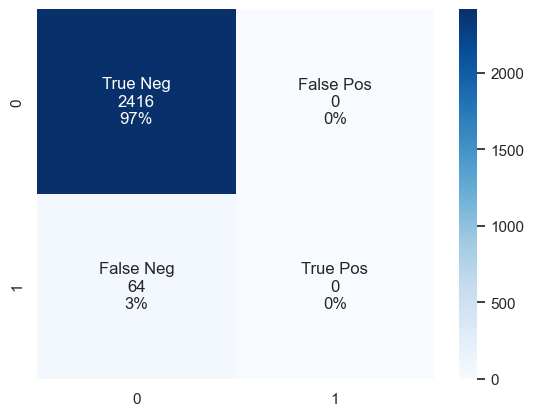

In [29]:
#training and evaluating dummy model as baseline for comparison
dummy_model = DummyClassifier(random_state=11) 
dummy_model.fit(X_train, y_train)

d_y_pred = dummy_model.predict(X_valid)

# function to assess model performance
def assess_model(y_axis, prediction):
    
    f1 = f1_score(y_true = y_axis, y_pred = prediction, average = "binary")
    print(f"f1 score: {f1}\n")

    c_matrix = confusion_matrix(y_pred = prediction, y_true = y_axis)

    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in c_matrix.flatten()]
    group_percentages = ["{0:.0%}".format(value) for value in c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(c_matrix, annot=labels, fmt="", cmap="Blues");

    print(classification_report(y_pred = prediction, y_true = y_axis, zero_division = 1))
    
#assessing dummy model
assess_model(y_valid, d_y_pred)

f1 score: 0.15730337078651685

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2416
           1       0.28      0.11      0.16        64

    accuracy                           0.97      2480
   macro avg       0.63      0.55      0.57      2480
weighted avg       0.96      0.97      0.96      2480



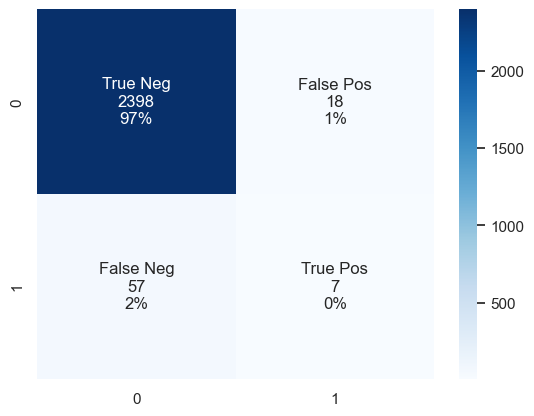

In [30]:
# training and evaluating a Gradient Boosting Classifier Model
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
gbc_y_pred = gbc_model.predict(X_valid)
assess_model(y_valid, gbc_y_pred)

In [31]:
importance = pd.DataFrame()
importance["column"] = X_train.columns
importance["importance"] = gbc_model.feature_importances_
importance_sort = importance.sort_values(by = "importance", ascending = False)
importance_sort.head(20)

,column,importance
43,46 (Current Assets - Inventory) / Short-Term L...,0.063478
32,34 Operating Expenses / Total Liabilities,0.056057
4,5 [(Cash + Short-Term Securities + Receivables...,0.056005
53,56 (Sales - Cost Of Products Sold) / Sales,0.048956
52,55 Working Capital,0.046440
23,25 (Equity - Share Capital) / Total Assets,0.043943
24,26 (Net Profit + Depreciation) / Total Liabili...,0.041820
12,13 (Gross Profit + Depreciation) / Sales,0.041175
58,61 Sales / Receivables,0.038727
0,1 Net Profit / Total Assets,0.035133


f1 score: 0.0

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2416
           1       0.00      0.00      0.00        64

    accuracy                           0.97      2480
   macro avg       0.49      0.50      0.49      2480
weighted avg       0.95      0.97      0.96      2480



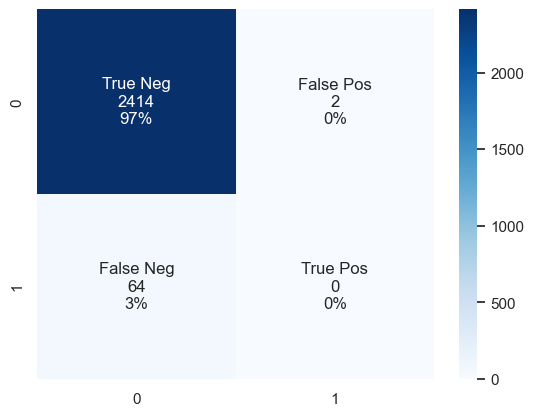

In [32]:
# Logistic Regression model
lr_model = LogisticRegression(solver='lbfgs',max_iter=200)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_valid)
assess_model(y_valid, lr_y_pred)

# Upsampling dataset with SMOTETomek

In [33]:
#SMOTETomek
up_mek = SMOTETomek(sampling_strategy = "auto", random_state = 11)
X_train_mek, y_train_mek = up_mek.fit_resample(X_train, y_train)

f1 score: 0.2207357859531773

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2416
           1       0.14      0.52      0.22        64

    accuracy                           0.91      2480
   macro avg       0.56      0.72      0.59      2480
weighted avg       0.96      0.91      0.93      2480



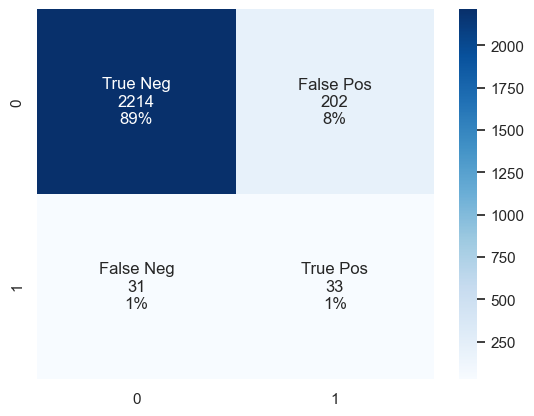

In [34]:
gbc_model.fit(X_train_mek, y_train_mek)
gbc_mek_y_pred = gbc_model.predict(X_valid)
assess_model(y_valid, gbc_mek_y_pred)

f1 score: 0.15009380863039398

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      2416
           1       0.09      0.62      0.15        64

    accuracy                           0.82      2480
   macro avg       0.54      0.72      0.52      2480
weighted avg       0.96      0.82      0.88      2480



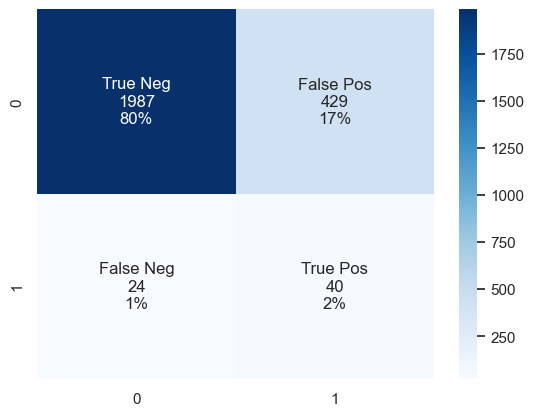

In [35]:
lr_mek_model = LogisticRegression(solver='lbfgs',max_iter=200)
lr_mek_model.fit(X_train_mek, y_train_mek)
lr_y_mek_pred = lr_mek_model.predict(X_valid)
assess_model(y_valid, lr_y_mek_pred)

# Hyperparameter tuning of Gradient Boosting Classifier Model

In [36]:
param_grid = {"n_estimators" : [5,10,25,50,100], 
              "max_depth" : [1,2,3,4,5], 
              "max_features" : [9,11,13,15,17]}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = "precision", n_jobs = 4, cv = 5)
grid.fit(X_train_mek, y_train_mek)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [9, 11, 13, 15, 17],
                         'n_estimators': [5, 10, 25, 50, 100]},
             scoring='precision')

In [37]:
print(grid.best_params_)

{'max_depth': 5, 'max_features': 9, 'n_estimators': 100}


# Evaluating GradientBoostingClassifier on validation set with best parameters

f1 score: 0.24870466321243523

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2416
           1       0.19      0.38      0.25        64

    accuracy                           0.94      2480
   macro avg       0.58      0.67      0.61      2480
weighted avg       0.96      0.94      0.95      2480



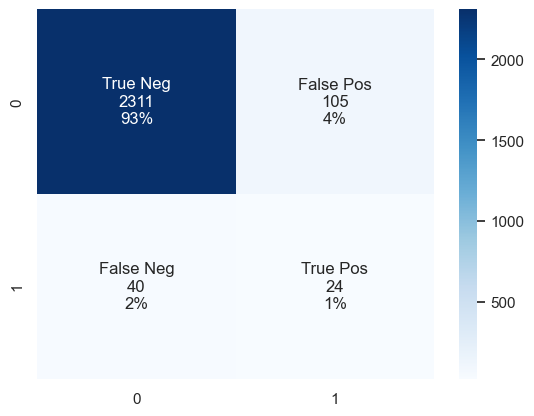

In [43]:
gbc_best_model = GradientBoostingClassifier(max_depth = 5, max_features = 9, n_estimators = 100)
gbc_best_model.fit(X_train_mek, y_train_mek)
gbc_best_y_pred = gbc_best_model.predict(X_valid)
assess_model(y_valid, gbc_best_y_pred)

# Evaluating GradientBoostingClassifier on test set with best parameters

f1 score: 0.1807909604519774

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2412
           1       0.15      0.23      0.18        69

    accuracy                           0.94      2481
   macro avg       0.56      0.60      0.58      2481
weighted avg       0.95      0.94      0.95      2481



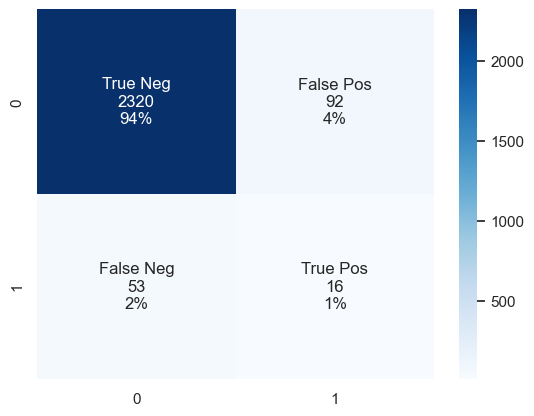

In [44]:
gbc_best_model = GradientBoostingClassifier(max_depth = 5, max_features = 9, n_estimators = 100)
gbc_best_model.fit(X_train_mek, y_train_mek)
gbc_test_y_pred = gbc_best_model.predict(X_test)
assess_model(y_test, gbc_test_y_pred)

# Applying Test Scenario on optimised ML model

In [45]:
def test_scenario(predicted_results):
    cash = 0
    approved = 0
    denied = 0
    repaid = 0
    defaulted = 0
    
    predicted_df = pd.DataFrame(predicted_results, index = X_test_pre.index, columns = ["prediction"])
    scenario = pd.concat([predicted_df, y_test], axis = 1)

    for index, row in scenario.iterrows():
        if row[0] == 0:
            cash = cash - 10000
            approved = approved + 1
            if row["Class"] == 0:
                cash = cash + 10500
                repaid = repaid + 1
            elif row["Class"] == 1:
                defaulted = defaulted + 1
        else:
            denied = denied + 1

    print(f"Final cash: ${cash}\nApproved loans: {approved}\nDenied loans: {denied}\nRepaid loans: {repaid}\nDefaulted loans: {defaulted}")

test_scenario(gbc_test_y_pred)

Final cash: $630000
Approved loans: 2373
Denied loans: 108
Repaid loans: 2320
Defaulted loans: 53


# Evaluating Altman Z-Score on test set

f1 score: 0.09815950920245399

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2412
           1       0.06      0.23      0.10        69

    accuracy                           0.88      2481
   macro avg       0.52      0.57      0.52      2481
weighted avg       0.95      0.88      0.91      2481



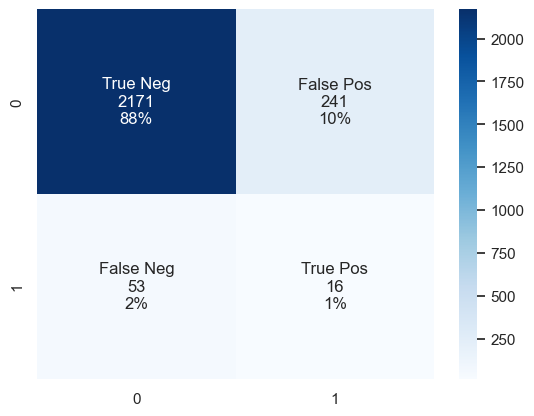

In [46]:
A = X_test_pre["3 Working Capital / Total Assets"]
B = X_test_pre["6 Retained Earnings / Total Assets"]
C = X_test_pre["7 Ebit / Total Assets"]
D = X_test_pre["8 Book Value Of Equity / Total Liabilities"]
E = X_test_pre["9 Sales / Total Assets"]
alt_pred = []

X_test_alt = X_test_pre.copy()
X_test_alt["altman"] = 1.2*A + 1.4*B + 3.3*C + 0.6*D + E

for index, row in X_test_alt.iterrows():
    if int(row["altman"]) <= 0:
        alt_pred.append(1)
    else:
        alt_pred.append(0)

alt_y_pred = pd.DataFrame(alt_pred, index = X_test_pre.index, columns = ["prediction"])
assess_model(y_test, alt_y_pred)

# Applying Test Scenario on Altman Z-Score

In [47]:
test_scenario(alt_y_pred)

Final cash: $555500
Approved loans: 2224
Denied loans: 257
Repaid loans: 2171
Defaulted loans: 53


# Conclusion
The tuned Gradient Boosting Classifier Model was more accurate in approving profitable loans, compared to using the Altman's Z-Score, and produced a greater ROI<br>
<br>
**Tuned Gradient Boosting Classifier Model:**<br>
f1 score: 0.181<br>
Final cash: $630000<br>
Approved loans: 2373<br>
Denied loans: 108<br>
Repaid loans: 2320<br>
Defaulted loans: 53<br>
<br>

**Altman's Z-Score:**<br>
f1 score: 0.098<br>
Final cash: $555500<br>
Approved loans: 2224<br>
Denied loans: 257<br>
Repaid loans: 2171<br>
Defaulted loans: 53<br>